Preparamos los conjuntos de datos para su utilización. 

- LPDR: quitamos las lineas de costa

- Ka band: eliminamos el SCALE FACTOR del dataset

- Ku band: eliminamos el SCALE FACTOR del dataset

In [2]:
import rasterio
import xarray as xr  
import os 
import numpy as np
import pandas as pd
from osgeo import gdal, osr
import glob
import regionmask
from scipy.ndimage import distance_transform_edt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from IPython.display import HTML
from datetime import datetime
import zipfile
import io

# LPDR

## Convertimos los archvios LPDR de .tif a .h5 para tener todos los ficheros en el mismo formato

In [3]:
def process_geotiff(file_path, output_dir):
    # Open the GeoTIFF file using rasterio
    with rasterio.open(file_path) as src:
        # Read raster data and metadata
        data = src.read()
        profile = src.profile

        # Extract dimensions and coordinates from rasterio dataset
        bands, height, width = data.shape
        transform = src.transform

        # Create xarray Dataset
        ds = xr.Dataset(
            {
                "band_data": (["band", "y", "x"], data),
            },
            coords={
                "y": range(height),
                "x": range(width),
                "band": range(bands)
            },
        )

        # Assuming band 8 has latitude and band 7 has longitude
        lat_values = ds.band_data.sel(band=8)[:, 0].values
        lon_values = ds.band_data.sel(band=7)[0, :].values

        # Assign latitude and longitude as coordinates
        ds = ds.assign_coords({'y': lat_values, 'x': lon_values})
        ds = ds.rename({"x": "lon", "y": "lat"})

        # Remove the 'long_name' attribute from band_data if it exists
        if 'long_name' in ds.band_data.attrs:
            del ds.band_data.attrs['long_name']

        # Generate the output NetCDF file path
        file_name = os.path.basename(file_path).split('.')[0]
        output_netcdf_file = os.path.join(output_dir, f"{file_name}.h5")

        # Save the dataset to a NetCDF file
        print(output_netcdf_file)
        ds.to_netcdf(output_netcdf_file, engine='h5netcdf')
        print(f"Dataset saved to {output_netcdf_file}")

# Directory containing the GeoTIFF files
input_dir = "../data/LPDR_v3_2017_EASEv2/"
output_dir = "../data/LPDR_v3_2017_EASEv2_h5/"

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Process all GeoTIFF files in the input directory
for file_path in glob.glob(os.path.join(input_dir, "*.tif")):
    process_geotiff(file_path, output_dir)

../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017347D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017347D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017151A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017151A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017014A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017014A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017202D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017202D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017297A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017297A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017081D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017081D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017278A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017278A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017106A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Ml

Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017327A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017131D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017131D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017074D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017074D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017262A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017262A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017218D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017218D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017219A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017219A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017075A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017075A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017263D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017263D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Ml

../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017255A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017255A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017043D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017043D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017106D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017106D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017310A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017310A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017039A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017039A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017193A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017193A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017055D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017055D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017243A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Ml

Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017136A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017320D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017320D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017248A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017248A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017024A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017024A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017232D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017232D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017161A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017161A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017048D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017048D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017224D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017224D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Ml

../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017013D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017013D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017156D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017156D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017340A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017340A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017204A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017204A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017012D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017012D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017157D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017157D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017341A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017341A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017068A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Ml

../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017025A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017025A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017233D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017233D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017160A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017160A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017249A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017249A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017264D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017264D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017072A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017072A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017137A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017137A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017321D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Ml

Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017066D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017089D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017089D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017123D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017123D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017335A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017335A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017342A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017342A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017154D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017154D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017011D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017011D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017207A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017207A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Ml

../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017050A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017050A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017246D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017246D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017303D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017303D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017115A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017115A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017180D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017180D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017211D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017211D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017007A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017007A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017142A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Ml

../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017231D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017231D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017027A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017027A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017318A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017318A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017362D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017362D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017174A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017174A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017031A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017031A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017227D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017227D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017159D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Ml

../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017061A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017061A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017277D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017277D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017348A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017348A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017173A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017173A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017365D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017365D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017220D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017220D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017036A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017036A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017109D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Ml

../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017308A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017308A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017164A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017164A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017021A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017021A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017237D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017237D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017108D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017108D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017172A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017172A.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017364D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017364D.h5
../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Mland_2017221D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5/AMSRU_Ml

### Quitamos las lineas de costa  en los datos LPDR

Appling landmask in all files in the folder

In [4]:
input_dir = "../data/LPDR_v3_2017_EASEv2_h5/"
output_dir = "../data/LPDR_v3_2017_EASEv2_h5_landmask/"

def create_landmask(lat: np.array, lon: np.array, c_dist: float = None) -> xr.DataArray:
    """
    Return a landmask without pixels that are c_dist or closer to a coast pixel.
    Default None: Do not remove coastline pixels.

    returns a DataArray with the 0 flag for land, NaN for ocean
    """

    land = regionmask.defined_regions.natural_earth_v5_1_2.land_10
    landmask = land.mask(lon_or_obj=lon, lat=lat)

    if c_dist:
        # Since we have all 0 (land) and nan (ocean) values, lets add 1 to the whole array to have land == 1
        aux_landmask = landmask + 1
        # Then fill the nan values with 0
        aux_landmask = aux_landmask.fillna(0)
        # Calculate the distance from each point to the closest ocean pixel (from all values > 0 to all values == 0)
        coastline_dist = distance_transform_edt(aux_landmask.values)
        # New mask, only the pixles c_dist away from the closest ocean pixel.
        coasline_mask = coastline_dist <= c_dist
        # Remove the coastline from the original landmask
        landmask = landmask.where(coasline_mask == False)

    return landmask

os.makedirs(output_dir, exist_ok=True)

for file_path in glob.glob(os.path.join(input_dir, "*.h5")):
    ldpr_ds = xr.open_dataset(file_path, engine='netcdf4')
    # Define the distance from the coast
    c_dist = 1.5  
    lat = ldpr_ds.band_data.sel(band=8).values[:, 0]
    lon = ldpr_ds.band_data.sel(band=7).values[0, :]
    landmask = create_landmask(lat=lat, lon=lon, c_dist=c_dist)
    # Convert landmask to binary: 1 for land, 0 for coast and ocean
    binary_landmask = xr.where(landmask.isnull(), 0, 1)
    # Add the binary landmask as a new coordinate to the dataset
    ldpr_ds['landmask'] = (('lat', 'lon'), binary_landmask.data)   

    file_name = os.path.basename(file_path)
    output_path = os.path.join(output_dir, file_name)
    ldpr_ds.to_netcdf(output_path, engine='netcdf4')
    print(f"Dataset saved to {output_path}")

Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017352D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017142A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017346D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017156A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017181A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017195A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017178D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017340A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017150D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017354A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017144D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017193D.h5
Dataset saved to ../data/LPD

Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017156D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017181D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017195D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017036D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017226A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017022D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017232A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017024A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017234D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017030A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017220D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017018A.h5
Dataset saved to ../data/LPD

Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017055A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017245D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017041A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017251D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017286D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017096A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017292D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017082A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017083A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017293D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017097A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017287D.h5
Dataset saved to ../data/LPD

Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017055D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017245A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017041D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017251A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017069D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017279A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017286A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017096D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017292A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017082D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017047A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017257D.h5
Dataset saved to ../data/LPD

Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017338D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017128A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017310D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017100A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017304D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017114A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017302A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017112D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017316A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017106D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017066D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017276A.h5
Dataset saved to ../data/LPD

Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017048D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017258A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017066A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017276D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017072A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017262D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017289D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017099A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017098A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017288D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017263D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017073A.h5
Dataset saved to ../data/LPD

Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017164D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017170D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017360A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017158D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017348A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017189A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017176A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017162A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017358D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017148A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017364D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017174A.h5
Dataset saved to ../data/LPD

Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017013A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017239A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017029D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017205A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017015D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017211A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017001D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017149D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017359A.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017161D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017175D.h5
Dataset saved to ../data/LPDR_v3_2017_EASEv2_h5_landmask/AMSRU_Mland_2017365A.h5
Dataset saved to ../data/LPD

---

# Ka band 36ghz

In [17]:
ka_file = "../data/ka_36ghz/GW1AM2_20170101_01D_EQMA_L3SGT36LA2220220_corrected.h5"
ka_ds = xr.open_dataset(ka_file, engine='netcdf4')
ka_ds

<xarray.Dataset> Size: 10MB
Dimensions:                     (lon: 1388, lat: 584)
Coordinates:
  * lon                         (lon) float32 6kB -179.9 -179.6 ... 179.6 179.9
  * lat                         (lat) float32 2kB -83.52 -81.98 ... 81.98 83.52
Data variables:
    Brightness Temperature (H)  (lat, lon) float32 3MB ...
    Brightness Temperature (V)  (lat, lon) float32 3MB ...
    Time Information            (lat, lon) float32 3MB ...
Attributes: (12/28)
    CDI:                       Climate Data Interface version 1.9.9 (https://...
    Conventions:               CF-1.6
    ProductName:               AMSR2-L3
    GeophysicalName:           Brightness Temperature (36GHz)
    MeanType:                  DayMean
    Projection:                EQR
    ...                        ...
    OrbitDirection:            Ascending
    PlatformShortName:         GCOM-W1
    SensorShortName:           AMSR2
    ECSDataModel:              B.0
    history:                   Tue Apr 27 13:13:52 2021: cdo remapbil,/media/...
    CDO:                       Climate Data Operators version 1.9.9 (https://...

Quitamos el SCALE FACTOR

In [18]:
ka_ds_corrected = ka_ds.copy()

for var in ka_ds.data_vars:
    data_array = ka_ds[var]
    if 'SCALE FACTOR' in data_array.attrs:
        scale_factor = data_array.attrs['SCALE FACTOR']
        # Quitar el scale factor de los datos
        ka_ds_corrected[var] = data_array * scale_factor
ka_ds_corrected

<xarray.Dataset> Size: 10MB
Dimensions:                     (lon: 1388, lat: 584)
Coordinates:
  * lon                         (lon) float32 6kB -179.9 -179.6 ... 179.6 179.9
  * lat                         (lat) float32 2kB -83.52 -81.98 ... 81.98 83.52
Data variables:
    Brightness Temperature (H)  (lat, lon) float32 3MB 204.9 204.8 ... 198.8
    Brightness Temperature (V)  (lat, lon) float32 3MB 234.3 234.1 ... 218.0
    Time Information            (lat, lon) float32 3MB -286.0 ... -1.026e+03
Attributes: (12/28)
    CDI:                       Climate Data Interface version 1.9.9 (https://...
    Conventions:               CF-1.6
    ProductName:               AMSR2-L3
    GeophysicalName:           Brightness Temperature (36GHz)
    MeanType:                  DayMean
    Projection:                EQR
    ...                        ...
    OrbitDirection:            Ascending
    PlatformShortName:         GCOM-W1
    SensorShortName:           AMSR2
    ECSDataModel:              B.0
    history:                   Tue Apr 27 13:13:52 2021: cdo remapbil,/media/...
    CDO:                       Climate Data Operators version 1.9.9 (https://...

In [19]:
min_values = {}
max_values = {}

# Iterar sobre cada variable en el dataset y calcular los valores mínimos y máximos
for var in ka_ds_corrected.data_vars:
    var_data = ka_ds_corrected[var]
    min_values[var] = var_data.min().item()
    max_values[var] = var_data.max().item()

# Mostrar los valores mínimos y máximos de cada banda
print('Valores mínimos y máximos de las variables tras aplicar el Scale Factor:')
for var in sorted(min_values.keys()):
    print(f"VaVariabler {var}: Min = {min_values[var]}, Max = {max_values[var]}")


Valores mínimos y máximos de las variables tras aplicar el Scale Factor:
VaVariabler Brightness Temperature (H): Min = 124.83999633789062, Max = 304.6499938964844
VaVariabler Brightness Temperature (V): Min = 172.58999633789062, Max = 311.8899841308594
VaVariabler Time Information: Min = -1369.0, Max = 1415.0


In [20]:
min_values = {}
max_values = {}

for var in ka_ds_corrected.data_vars:
    var_data = ka_ds_corrected[var]
    
    min_values[var] = var_data.min().item()
    max_values[var] = var_data.max().item()

data = {
    'Variable': list(min_values.keys()),
    'Min': list(min_values.values()),
    'Max': list(max_values.values())
}

df = pd.DataFrame(data)
df = df.sort_values(by='Variable').reset_index(drop=True)

html_table = df.to_html(index=False)

display(HTML(html_table))

Variable,Min,Max
Brightness Temperature (H),124.839996,304.649994
Brightness Temperature (V),172.589996,311.889984
Time Information,-1369.000000,1415.000000


Text(0.5, 1.0, 'Distribution of Brightness Temperature (H) at 36 GHz')

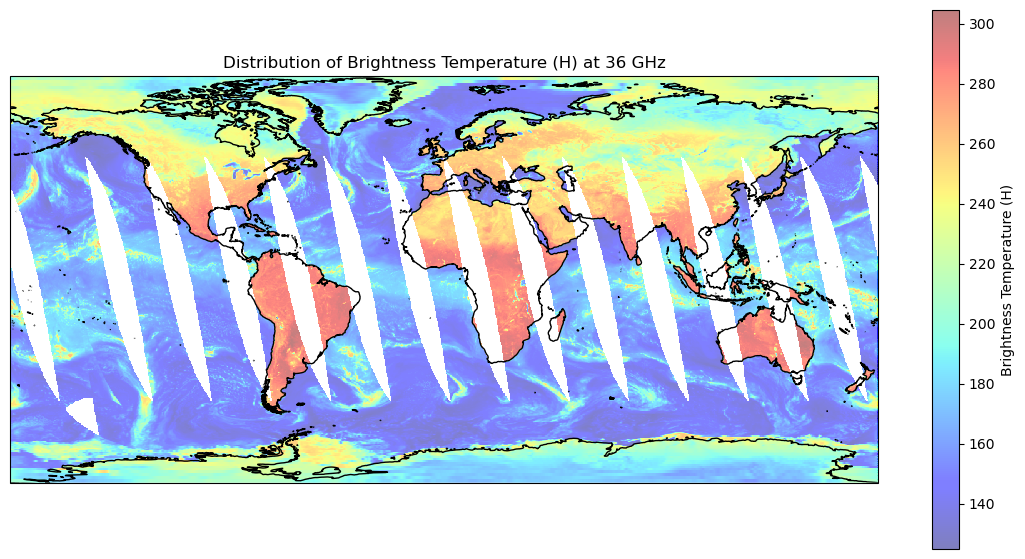

In [21]:
fig, ax = plt.subplots(1,1,figsize =(14,7), subplot_kw={"projection": ccrs.PlateCarree()})

ka_ds_corrected["Brightness Temperature (H)"].plot(ax = ax, alpha = 0.5, cmap = "jet")
ax.coastlines("50m")
ax.set_title("Distribution of Brightness Temperature (H) at 36 GHz", fontsize=12)

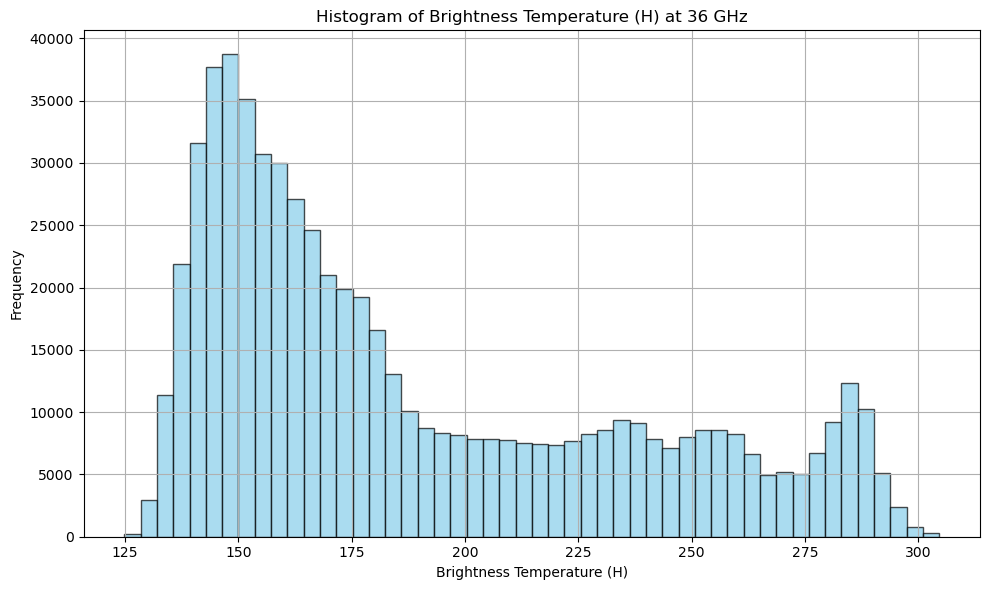

In [27]:
import matplotlib.pyplot as plt

# Extraer los valores como una serie plana (1D)
bt_values = ka_ds_corrected["Brightness Temperature (H)"].values.flatten()

# Eliminar valores nulos si existen
bt_values = bt_values[~np.isnan(bt_values)]

# Crear histograma
plt.figure(figsize=(10, 6))
plt.hist(bt_values, bins=50, color='skyblue', edgecolor='black', alpha=0.7)

# Añadir etiquetas y título
plt.title('Histogram of Brightness Temperature (H) at 36 GHz')
plt.xlabel('Brightness Temperature (H)')
plt.ylabel('Frequency')

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


# Ku band 18ghz

In [8]:
ku_file = "../data/ku_18ghz/GW1AM2_20170101_01D_EQMA_L3SGT18LA2220220_corrected.h5"
ku_ds = xr.open_dataset(ku_file, engine='netcdf4')
ku_ds

<xarray.Dataset> Size: 10MB
Dimensions:                     (lon: 1388, lat: 584)
Coordinates:
  * lon                         (lon) float32 6kB -179.9 -179.6 ... 179.6 179.9
  * lat                         (lat) float32 2kB -83.52 -81.98 ... 81.98 83.52
Data variables:
    Brightness Temperature (H)  (lat, lon) float32 3MB ...
    Brightness Temperature (V)  (lat, lon) float32 3MB ...
    Time Information            (lat, lon) float32 3MB ...
Attributes: (12/28)
    CDI:                       Climate Data Interface version 1.9.9 (https://...
    Conventions:               CF-1.6
    ProductName:               AMSR2-L3
    GeophysicalName:           Brightness Temperature (18GHz)
    MeanType:                  DayMean
    Projection:                EQR
    ...                        ...
    OrbitDirection:            Ascending
    PlatformShortName:         GCOM-W1
    SensorShortName:           AMSR2
    ECSDataModel:              B.0
    history:                   Tue Apr 27 23:03:07 2021: cdo remapbil,/media/...
    CDO:                       Climate Data Operators version 1.9.9 (https://...

In [9]:
min_values = {}
max_values = {}

for var in ku_ds.data_vars:
    var_data = ku_ds[var]
    
    min_values[var] = var_data.min().item()
    max_values[var] = var_data.max().item()

data = {
    'Variable': list(min_values.keys()),
    'Min': list(min_values.values()),
    'Max': list(max_values.values())
}

df = pd.DataFrame(data)
df = df.sort_values(by='Variable').reset_index(drop=True)

html_table = df.to_html(index=False)

display(HTML(html_table))

Variable,Min,Max
Brightness Temperature (H),9261.0,30392.0
Brightness Temperature (V),16258.0,31172.0
Time Information,-1369.0,1415.0


In [10]:
min_values = {}
max_values = {}

# Iterar sobre cada variable en el dataset y calcular los valores mínimos y máximos
for var in ku_ds.data_vars:
    var_data = ku_ds[var]
    min_values[var] = var_data.min().item()
    max_values[var] = var_data.max().item()

# Mostrar los valores mínimos y máximos de cada banda
print('Valores mínimos y máximos de las variables')
for var in sorted(min_values.keys()):
    print(f"Variable {var}: Min = {min_values[var]}, Max = {max_values[var]}")

Valores mínimos y máximos de las variables
Variable Brightness Temperature (H): Min = 9261.0, Max = 30392.0
Variable Brightness Temperature (V): Min = 16258.0, Max = 31172.0
Variable Time Information: Min = -1369.0, Max = 1415.0


Vamos a eliminar el SCALE FACTOR

In [11]:
ku_ds_corrected = ku_ds.copy()

for var in ku_ds.data_vars:
    data_array = ku_ds[var]
    if 'SCALE FACTOR' in data_array.attrs:
        scale_factor = data_array.attrs['SCALE FACTOR']
        # Quitar el scale factor de los datos
        ku_ds_corrected[var] = data_array * scale_factor
ku_ds_corrected

<xarray.Dataset> Size: 10MB
Dimensions:                     (lon: 1388, lat: 584)
Coordinates:
  * lon                         (lon) float32 6kB -179.9 -179.6 ... 179.6 179.9
  * lat                         (lat) float32 2kB -83.52 -81.98 ... 81.98 83.52
Data variables:
    Brightness Temperature (H)  (lat, lon) float32 3MB 188.4 188.1 ... 212.9
    Brightness Temperature (V)  (lat, lon) float32 3MB 229.7 229.5 ... 243.5
    Time Information            (lat, lon) float32 3MB -286.0 ... -1.026e+03
Attributes: (12/28)
    CDI:                       Climate Data Interface version 1.9.9 (https://...
    Conventions:               CF-1.6
    ProductName:               AMSR2-L3
    GeophysicalName:           Brightness Temperature (18GHz)
    MeanType:                  DayMean
    Projection:                EQR
    ...                        ...
    OrbitDirection:            Ascending
    PlatformShortName:         GCOM-W1
    SensorShortName:           AMSR2
    ECSDataModel:              B.0
    history:                   Tue Apr 27 23:03:07 2021: cdo remapbil,/media/...
    CDO:                       Climate Data Operators version 1.9.9 (https://...

In [12]:
import pandas as pd
from IPython.display import HTML

min_values = {}
max_values = {}

for var in ku_ds_corrected.data_vars:
    var_data = ku_ds_corrected[var]
    
    min_values[var] = var_data.min().item()
    max_values[var] = var_data.max().item()

data = {
    'Variable': list(min_values.keys()),
    'Min': list(min_values.values()),
    'Max': list(max_values.values())
}

df = pd.DataFrame(data)
df = df.sort_values(by='Variable').reset_index(drop=True)

html_table = df.to_html(index=False)

display(HTML(html_table))

Variable,Min,Max
Brightness Temperature (H),92.610001,303.919983
Brightness Temperature (V),162.580002,311.720001
Time Information,-1369.000000,1415.000000


In [13]:
min_values = {}
max_values = {}

# Iterar sobre cada variable en el dataset y calcular los valores mínimos y máximos
for var in ku_ds_corrected.data_vars:
    var_data = ku_ds_corrected[var]
    min_values[var] = var_data.min().item()
    max_values[var] = var_data.max().item()

# Mostrar los valores mínimos y máximos de cada banda
print('Valores mínimos y máximos de las variables tras aplicar el Scale Factor:')
for var in sorted(min_values.keys()):
    print(f"VaVariabler {var}: Min = {min_values[var]}, Max = {max_values[var]}")


Valores mínimos y máximos de las variables tras aplicar el Scale Factor:
VaVariabler Brightness Temperature (H): Min = 92.61000061035156, Max = 303.91998291015625
VaVariabler Brightness Temperature (V): Min = 162.5800018310547, Max = 311.7200012207031
VaVariabler Time Information: Min = -1369.0, Max = 1415.0


Text(0.5, 1.0, 'Distribution of Brightness Temperature (H) at 18 GHz')

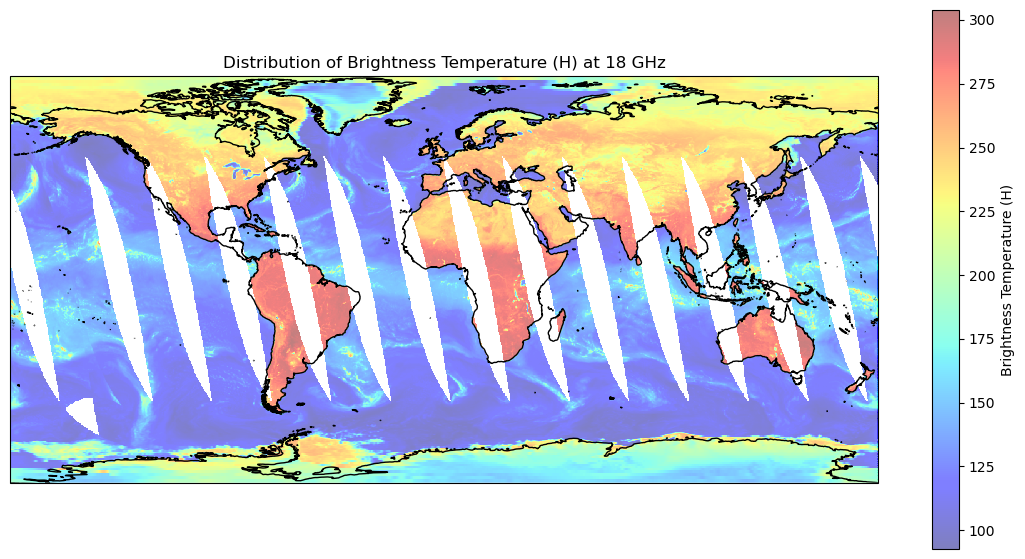

In [15]:
fig, ax = plt.subplots(1,1,figsize =(14,7), subplot_kw={"projection": ccrs.PlateCarree()})

ku_ds_corrected["Brightness Temperature (H)"].plot(ax = ax, alpha = 0.5, cmap = "jet")
ax.coastlines("50m")
ax.set_title("Distribution of Brightness Temperature (H) at 18 GHz", fontsize=12)

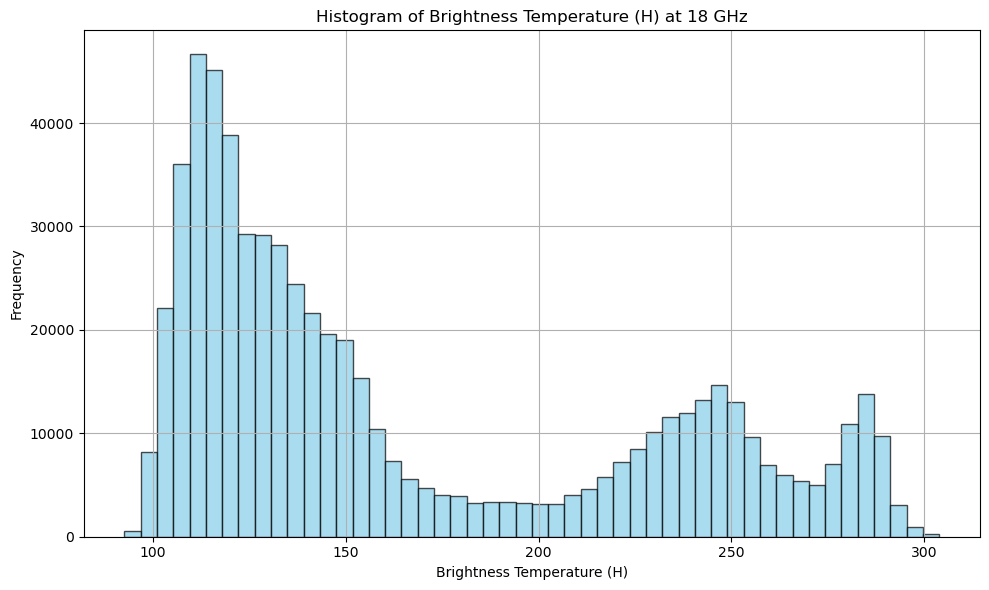

In [28]:
import matplotlib.pyplot as plt

# Extraer los valores como una serie plana (1D)
bt_values = ku_ds_corrected["Brightness Temperature (H)"].values.flatten()

# Eliminar valores nulos si existen
bt_values = bt_values[~np.isnan(bt_values)]

# Crear histograma
plt.figure(figsize=(10, 6))
plt.hist(bt_values, bins=50, color='skyblue', edgecolor='black', alpha=0.7)

# Añadir etiquetas y título
plt.title('Histogram of Brightness Temperature (H) at 18 GHz')
plt.xlabel('Brightness Temperature (H)')
plt.ylabel('Frequency')

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

